In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
reported_data = pd.read_csv('reported_numbers.csv')
estimated_data = pd.read_csv('estimated_numbers.csv')
incidence_data = pd.read_csv('incidence_per_1000_pop_at_risk.csv')

In [3]:
print(reported_data.head())  

       Country  Year  No. of cases  No. of deaths             WHO Region
0  Afghanistan  2017      161778.0           10.0  Eastern Mediterranean
1      Algeria  2017           0.0            0.0                 Africa
2       Angola  2017     3874892.0        13967.0                 Africa
3    Argentina  2017           0.0            1.0               Americas
4      Armenia  2017           0.0            NaN                 Europe


In [4]:
print(estimated_data.head())  

       Country  Year              No. of cases      No. of deaths  \
0  Afghanistan  2017     630308[495000-801000]       298[110-510]   
1      Algeria  2017                         0                  0   
2       Angola  2017  4615605[3106000-6661000]  13316[9970-16600]   
3    Argentina  2017                         0                  0   
4      Armenia  2017                         0                  0   

   No. of cases_median  No. of cases_min  No. of cases_max  \
0               630308          495000.0          801000.0   
1                    0               NaN               NaN   
2              4615605         3106000.0         6661000.0   
3                    0               NaN               NaN   
4                    0               NaN               NaN   

   No. of deaths_median  No. of deaths_min  No. of deaths_max  \
0                   298              110.0              510.0   
1                     0                NaN                NaN   
2                

In [5]:
print(incidence_data.head())  

       Country  Year  No. of cases             WHO Region
0  Afghanistan  2018         29.01  Eastern Mediterranean
1      Algeria  2018          0.00                 Africa
2       Angola  2018        228.91                 Africa
3    Argentina  2018          0.00               Americas
4      Armenia  2018          0.00                 Europe


In [6]:
def getUnique(df):
    for col in df.columns:
        print(col + " : " + str(df[col].nunique()))

In [7]:
getUnique(reported_data)

Country : 108
Year : 18
No. of cases : 1426
No. of deaths : 708
WHO Region : 6


In [8]:
getUnique(estimated_data)

Country : 107
Year : 8
No. of cases : 695
No. of deaths : 519
No. of cases_median : 694
No. of cases_min : 448
No. of cases_max : 481
No. of deaths_median : 447
No. of deaths_min : 255
No. of deaths_max : 336
WHO Region : 6


In [9]:
getUnique(incidence_data)

Country : 107
Year : 19
No. of cases : 1432
WHO Region : 6


**1. Reported data**

In [10]:
reported = reported_data.groupby(['WHO Region']).agg({'No. of cases' : 'sum'}).reset_index()
x = reported_data['No. of cases'].sum()
reported['Percentage'] = (reported['No. of cases']/x)*100
reported

,WHO Region,No. of cases,Percentage
0,Africa,586002159.0,87.930388
1,Americas,13894342.0,2.084864
2,Eastern Mediterranean,19932663.0,2.990922
3,Europe,112675.0,0.016907
4,South-East Asia,39468640.0,5.922321
5,Western Pacific,7028251.0,1.054598


Text(0.5, 1.0, 'In other WHO Regions')

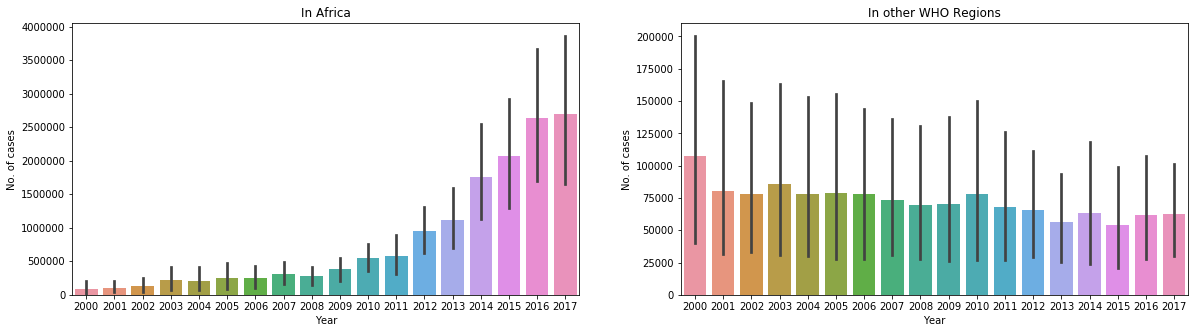

In [11]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1, 2, figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases' , data = reported_data[reported_data['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases' , data = reported_data[reported_data['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

2. Estimated data

In [12]:
estimated = estimated_data.groupby(['WHO Region']).agg({'No. of cases_median' : 'sum'}).reset_index()
x = estimated_data['No. of cases_median'].sum()
estimated['Percentage'] = (estimated['No. of cases_median']/x)*100
estimated

,WHO Region,No. of cases_median,Percentage
0,Africa,1587152540,89.056616
1,Americas,13025802,0.730890
2,Eastern Mediterranean,34456176,1.933368
3,Europe,262,0.000015
4,South-East Asia,132725734,7.447365
5,Western Pacific,14823234,0.831746


Text(0.5, 1.0, 'In other WHO Regions')

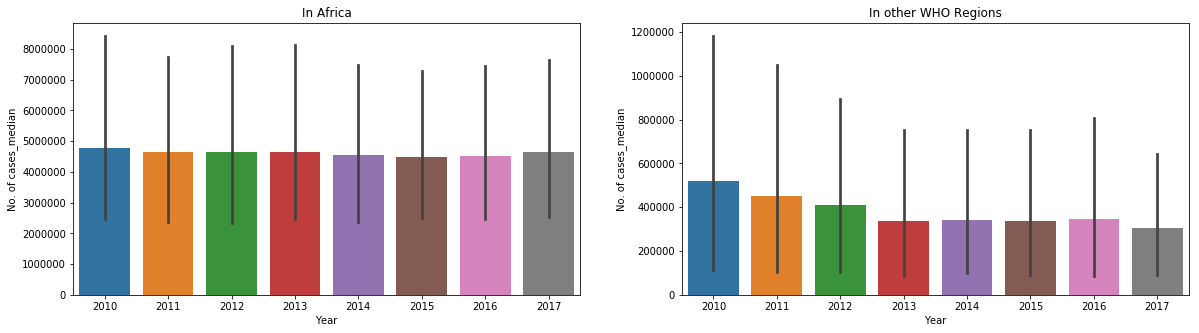

In [13]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1,2 , figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases_median' 
            , data = estimated_data[estimated_data['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases_median' 
            , data = estimated_data[estimated_data['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

**3. Incidence data**

In [14]:
incidence = incidence_data.groupby(['WHO Region']).agg({'No. of cases' : 'sum'}).reset_index()
x = incidence_data['No. of cases'].sum()
incidence['Percentage'] = (incidence['No. of cases']/x)*100
incidence

,WHO Region,No. of cases,Percentage
0,Africa,192303.47,86.632035
1,Americas,9666.15,4.354566
2,Eastern Mediterranean,4196.10,1.890328
3,Europe,107.84,0.048582
4,South-East Asia,2824.23,1.272306
5,Western Pacific,12879.53,5.802183


Text(0.5, 1.0, 'In other WHO Regions')

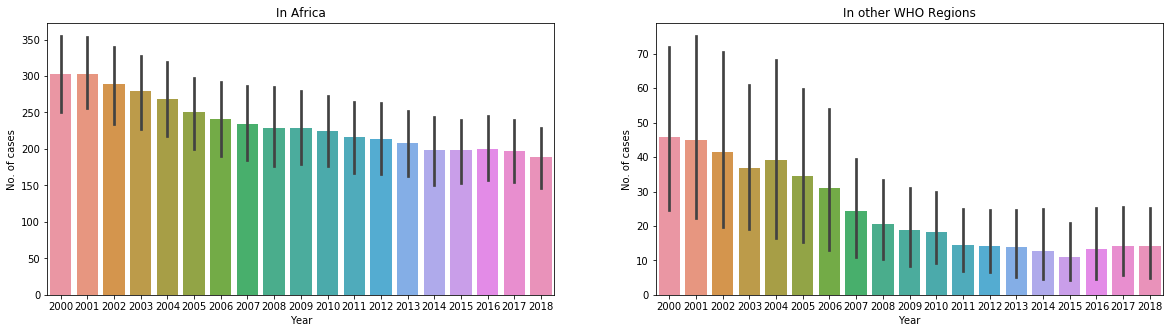

In [15]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1,2 , figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases' 
            , data = incidence_data[incidence_data['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases' 
            , data = incidence_data[incidence_data['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

*Observing the graph, the trends show that the numbers are declining for both. Its small yearly decrease for Africa region, whereas, for other regions, it's a good yearly decrease.*